Спершу підключимо необхідні бібліотеки

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Завантажуємо датасет з файлу для тренування алгоритму

In [2]:
trainData = np.genfromtxt('lab_1_train.csv', delimiter=',', skip_header=1, usecols=(1,2))
trainData[:5]

array([[0.00000000e+00, 2.01490142e+01],
       [1.01010101e-02, 1.99787227e+01],
       [2.02020202e-02, 2.02347106e+01],
       [3.03030303e-02, 2.05175150e+01],
       [4.04040404e-02, 2.00105621e+01]])

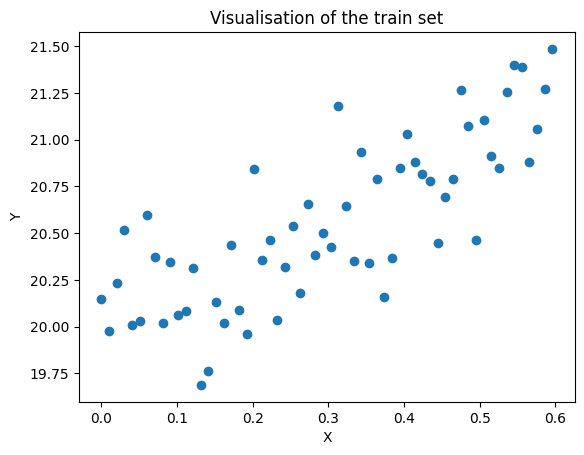

In [3]:
plt.scatter(trainData[:, 0], trainData[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualisation of the train set")
plt.show()

Для навчання алгоритму лінійної регресії за допомогою класичного градієнтного спуску нам потрібно буде неодноразово використовувати одні й ті ж формули, тому для зручності реалізуємо клас linearRegression, що міститме необхідні методи:
<ul>
    <li>
        <h3>prediction</h3>
        Обчислення прогнозованих значень за допомогою поточних параметрів моделі<br>
        $y = \theta_0 + \theta_1x$
    </li>
    <li>
        <h3>costFunction</h3>
        Обчислення функції втрат з використанням Mean Squared Error (середньоквадратичної похибки)<br>
        $J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} [h_\theta(x_i) - y_i]^2$<br>
        де $h_\theta(x_i)$ - прогнозоване значення
    </li>
    <li>
        <h3>gradient</h3>
        <p>Обчислення градієнту функції втрат для параметрів моделі: $\theta_0$ та $\theta_1$</p>
        <p>$\theta_0 = \theta_0 - \frac{\alpha}{m} \sum_{i=1}^{m} [h_\theta(x_i) - y_i]$</p>
        <p>$\theta_1 = \theta_1 - \frac{\alpha}{m} \sum_{i=1}^{m} [(h_\theta(x_i) - y_i)x_i]$</p>
        <p>Де $\alpha$ - learning rate, визначає крок з яким буде рухатись градієнтний спуск. <br>Завелике значення призведе до того, що фукнція буде розходитись. <br>Замале значення означатиме відносно більшу кількість кроків, необхідних для досягнення мінімуму</p>
    </li>
</ul>

In [4]:
class linearRegression:
    def __init__(self, X, Y, O_0=0, O_1=0):
        self.X = X
        self.Y = Y
        self.O = [O_0, O_1]

    def prediction(self):
        Ypredicted = np.array([])
        for x in self.X:
            Ypredicted = np.append(Ypredicted, self.O[0] + (self.O[1] * x))
        return Ypredicted
    
    def costFunction(self, Ypredicted):
        m = len(self.Y)
        J = (1 / 2 * m) * (np.sum(Ypredicted - self.Y)**2)
        return J

    def gradient(self, learningRate, Ypredicted):
        Ypredicted = self.prediction()
        m = len(self.Y)
        self.O[0] = self.O[0] - (learningRate / m) * np.sum(Ypredicted - self.Y)
        self.O[1] = self.O[1] - (learningRate / m) * np.sum((Ypredicted - self.Y) * self.X)

Тепер можемо використати ці методи для тренування алгоритму. <br>Спершу потрібно визначити задовільне для даної моделі значення learning rate (з причин, описаних вище) та бажану точність визначення мінімуму функції втрат. <br>Ці параметри впливатимось як на те, скільки ітерацій знадобиться для навчання моделі, так і на те чи навчання взагалі буде успішним. <br>Послідовність дій для кожної епохи:
<ul>
    <li>Прогнозування на основі поточних параметрів моделі</li>
    <li>Розграхунок фукнції втрат</li>
    <li>Оновлення параметрів моделі за допомогою градієнтного спуску</li>
    <li>Перевірка процесу навчання моделі на збіжність, шляхом аналізу значення функції втрат відносно значень на попередніх епохах</li>
    <li>Перевірка, чи досягнуто встановленої точності визначення мінімуму функції втрат, шляхом порівняння її значень для поточної та попередньої епохи</li>
</ul>

In [5]:
lr = linearRegression(trainData[:, 0], trainData[:, 1])
learningRate = 0.1
limit = 0.001
costs = []
epoch = 0
while True:
    Ypredicted = lr.prediction()
    costs.append(lr.costFunction(Ypredicted))
    lr.gradient(learningRate, Ypredicted)
    epoch += 1
    print(f"Epoch {epoch}, cost: {costs[-1]: .3f}, b0: {lr.O[0]: .3f}, b1: {lr.O[1]: .3f}")
    if epoch > 2:
        if abs(costs[-1] - costs[-2]) > abs(costs[-2] - costs[-3]):
            print("Too big learning rate")
            break
        if abs(costs[-1] - costs[-2]) <= limit:
            print("Calculation finished")
            break

Epoch 1, cost:  45606731.113, b0:  2.055, b1:  0.618
Epoch 2, cost:  36208999.323, b0:  3.886, b1:  1.168
Epoch 3, cost:  28749060.213, b0:  5.518, b1:  1.657
Epoch 4, cost:  22827200.773, b0:  6.971, b1:  2.091
Epoch 5, cost:  18126173.833, b0:  8.267, b1:  2.477
Epoch 6, cost:  14394182.525, b0:  9.421, b1:  2.819
Epoch 7, cost:  11431375.824, b0:  10.450, b1:  3.123
Epoch 8, cost:  9079130.678, b0:  11.367, b1:  3.393
Epoch 9, cost:  7211545.679, b0:  12.184, b1:  3.632
Epoch 10, cost:  5728689.941, b0:  12.913, b1:  3.844
Epoch 11, cost:  4551244.992, b0:  13.562, b1:  4.032
Epoch 12, cost:  3616252.237, b0:  14.140, b1:  4.198
Epoch 13, cost:  2873737.856, b0:  14.656, b1:  4.345
Epoch 14, cost:  2284034.087, b0:  15.116, b1:  4.475
Epoch 15, cost:  1815653.198, b0:  15.526, b1:  4.589
Epoch 16, cost:  1443600.102, b0:  15.892, b1:  4.690
Epoch 17, cost:  1148033.112, b0:  16.218, b1:  4.779
Epoch 18, cost:  913200.996, b0:  16.508, b1:  4.857
Epoch 19, cost:  726599.327, b0:  16.

Оскільки градієнтний спуск зійшовся, можемо порахувати фукнцію втрат на тестових даних.

In [6]:
testData = np.genfromtxt('lab_1_test.csv', delimiter=',', skip_header=1, usecols=(1,2))
testData[:5]

array([[ 0.60606061, 21.06836894],
       [ 0.61616162, 21.17662554],
       [ 0.62626263, 20.92062476],
       [ 0.63636364, 20.91386529],
       [ 0.64646465, 21.53668704]])

In [7]:
lrTest = linearRegression(testData[:, 0], testData[:, 1], lr.O[0], lr.O[1])
print(f"Test set cost: {lrTest.costFunction(lrTest.prediction()): .3f}")

Test set cost:  19.926


Як бачимо, значення функції втрат на тестових даних перевищує те, що було отримане внаслідок градієнтного спуску на навчальних даних, проте цього можна було очікувати адже побудована модель не навчалась на цих даних. Попри це, значення функції втрат на тестових даних дозволяє зробити висновок, що модель була вірно навчена відповідно до використаних при навчанні даних. <br> Візуалізуємо отриману модель та наявні набори даних на одному графіку:

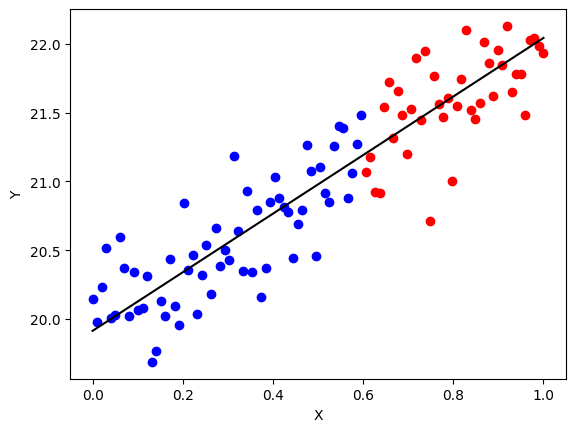

In [8]:
plt.scatter(trainData[:, 0], trainData[:, 1], color="b")
plt.scatter(testData[:, 0], testData[:, 1], color="r")
xPlot = np.concatenate((trainData[:, 0], testData[:, 0]))
yPlot = lr.O[0] + lr.O[1] * xPlot
plt.plot(xPlot, yPlot, color="k")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Висновок: в роботі було реалізовано лінійну регресію для набору даних з одним незалежним параметром, з використаннямкласичного градієнтного спуску, хоча цей метод може бути також застосований і для моделей з більшою кількістю незалежних параметрів, з відповідними змінами у формулах обчислення градієнту та функції втрат.